In [5]:
import sys
import os
import cairosvg
from IPython.core.display import display, Markdown
from PIL import Image
from json_dict import JsonDict
from featurizer import FeaturizerList
sys.path.append(os.path.abspath(".."))
from featurizer.chem_featurizer import default_atom_featurizer, atom_degree_one_hot, \
    atom_symbol_hcnopsclbr_other_one_hot, atom_implicit_valence_one_hot, atom_formal_charge, atom_partial_charge, \
    atom_hybridization_one_hot, atom_is_aromatic, atom_total_num_H_one_hot, atom_mass, atom_num_radical_electrons


from rdkit import Chem
import numpy as np

[CH2]1[C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)[CH2][C](C)(C(=O)OC)1
[CH2][C](C)(C(=O)OC)


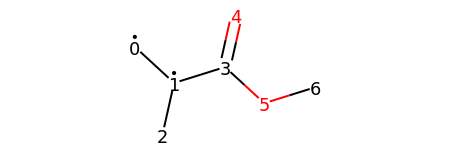

In [2]:
repeating_unit_smiles="[CH2][C](C)(C(=O)OC)"
NRU=10

s=repeating_unit_smiles.replace("]","]1",1) + repeating_unit_smiles*(NRU-1) +"1"
print(s)
mol = Chem.MolFromSmiles(s)
Chem.Draw.MolToImage(mol).save("gc_circ.png")

s = repeating_unit_smiles
print(s)
mol = Chem.MolFromSmiles(s)
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
Chem.Draw.MolToImage(mol).save("gc_one_number.png")
mol

In [7]:
featurizer = FeaturizerList([atom_symbol_hcnopsclbr_other_one_hot,
 atom_degree_one_hot,
 atom_degree_one_hot,
 atom_implicit_valence_one_hot,
 atom_formal_charge,
 atom_partial_charge,
 atom_hybridization_one_hot,
 atom_is_aromatic,
 atom_total_num_H_one_hot,
 atom_mass,
 atom_num_radical_electrons,
 ])

for f in featurizer._feature_list:
    print(f,np.array(f(mol.GetAtomWithIdx(6))))
np.array(featurizer(mol.GetAtomWithIdx(6)))

atom_symbol_hcnopsclbr_other_one_hot [False  True False False False False False False False]
atom_degree_one_hot [False  True False False False False False False]
atom_degree_one_hot [False  True False False False False False False]
atom_implicit_valence_one_hot [False False False  True False False False False]
atom_formal_charge [0]
atom_partial_charge [0.08060857]
atom_hybridization_one_hot [False False  True False False False False False]
atom_is_aromatic [False]
atom_total_num_H_one_hot [False False False  True False False False False False]
atom_mass [0.12011]
atom_num_radical_electrons [0]


array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08060857,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.12011   , 0.        ])